In [ ]:
#  In this module we will implement PCA on cipher images and
#   check if we are able to reduce the dimensions(Reduce the insignificant data which is not needed)

In [ ]:
# First step is to load tha data and understand

In [ ]:
# The first step is to calculate the mean values of each column.This gives the centre of all all features.
# Change the centre to origin
# 



In [1]:


import pandas as pd
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
import os
import platform
from subprocess import check_output

In [2]:
with open("E:\Algo-Learning\K-NearestNeighbours\cifar-10-batches-py\data_batch_1", 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
images  = dict[b'data']

(3072,)
(32, 32, 3)


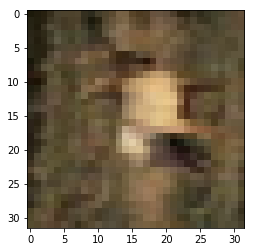

In [3]:
# lets plot one image
single_img =np.array(images[3])
print(single_img.shape)

single_img_reshaped = single_img.reshape(3,32,32).transpose([2,1 , 0])
print(single_img_reshaped.shape)
plt.imshow(single_img_reshaped)



[28 37 38 ... 28 37 46]


In [4]:
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000,3072)
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=10000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'E:\Algo-Learning\K-NearestNeighbours\cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    x_train = X_train.astype('float32')
    x_test = X_test.astype('float32')

    x_train /= 255
    x_test /= 255

    return x_train, y_train, X_val, y_val, x_test, y_test

In [5]:
x_train, y_train, x_val, y_val, x_test, y_test = get_CIFAR10_data()


In [17]:
print(np.shape(x_test))

(10000, 3072)


In [ ]:
# This is where relocation of the centre comes into picture.

In [ ]:
    print(np.shape(x_train))
    M = mean(x_train.T, axis=1)
    print(M)
    Centre = x_train - M
    print(Centre)

(49000, 3072)
[0.51232    0.5100241  0.51357174 ... 0.44652233 0.44674474 0.44862607]
[[-0.28094745 -0.34139663 -0.31749332 ...  0.10249731 -0.11733297
  -0.16627312]
 [ 0.09160161 -0.01590642 -0.10180703 ...  0.09857574  0.11011803
   0.11607984]
 [ 0.48768002  0.4821328   0.47858512 ... -0.12103212 -0.12125453
  -0.1192143 ]
 ...
 [-0.2731043  -0.32963192 -0.36063057 ...  0.141713    0.09835333
   0.01019746]
 [-0.4731043  -0.46688682 -0.43514037 ...  0.38092867  0.36894155
   0.3552955 ]
 [ 0.17395455  0.16448575  0.15701652 ... -0.14063996 -0.09380355
  -0.09568489]]


In [7]:
#To find the Eigen vectors find the covariance of matrix and find the EigenDecomposition of the matrix

In [13]:
covMatrix = cov(Centre.T)
eigenvalues, eigenvectors = eig(covMatrix)

In [14]:
# We will project data in next step
print(eigenvalues)
print(eigenvectors)

[5.53561930e+01 2.14509379e+01 1.27343302e+01 ... 8.00337049e-06
 6.72674996e-06 6.79001732e-06]
[[-2.63114024e-02  1.59630506e-02  2.16860141e-02 ...  3.92286307e-04
  -1.75218057e-03  3.88246678e-03]
 [-2.62379977e-02  1.62619849e-02  2.15400724e-02 ... -6.66250346e-03
  -1.75315868e-02 -1.05289936e-03]
 [-2.62787890e-02  1.66607595e-02  2.14676137e-02 ... -7.14056292e-03
   4.13190541e-02  5.44361309e-05]
 ...
 [-1.87126182e-02 -2.20015948e-02  1.68903544e-02 ... -6.93450675e-03
   6.58316331e-03 -1.07043015e-02]
 [-1.89184129e-02 -2.12393171e-02  1.69648776e-02 ...  6.61104467e-03
  -9.73515990e-03  8.87043009e-03]
 [-1.92383363e-02 -2.05245610e-02  1.70754225e-02 ...  1.34099100e-05
   4.91604004e-03 -3.05468382e-03]]


In [15]:
P = eigenvectors.T.dot(Centre.T)

In [20]:
# Now we have Transformed  train data .
print(np.shape(P))
print(np.shape(y_train))
print(P.T)

(3072, 49000)
(49000,)
[[ 6.39790384e+00 -2.72400391e+00 -1.50187308e+00 ... -2.36402781e-04
   2.69245304e-03  2.47691759e-03]
 [-8.31968939e-01  9.38838910e-01 -6.01251570e+00 ... -4.71263948e-04
   1.67284588e-03  1.03741190e-03]
 [-7.73069667e+00  1.15377413e+01  2.72894655e+00 ... -1.50209318e-03
  -6.66073028e-04 -8.08319933e-04]
 ...
 [ 1.11012655e+00 -4.43138371e+00 -1.14573894e+00 ...  3.96197809e-03
  -2.78185262e-03  3.19152743e-03]
 [ 1.07380449e+01 -4.58087393e+00  3.90573551e+00 ...  5.71319442e-04
  -2.11034578e-03  1.50968175e-04]
 [-2.54292366e+00  5.98580861e+00 -4.63864979e+00 ...  2.56734649e-05
   7.80727071e-04 -1.66204024e-03]]


In [19]:
# Lets put everything Together 

def PCA_Custom(data):
    print(np.shape(data))
    M = mean(data.T, axis=1)
    print(M)
    Centre = data - M
    print(Centre)
    covMatrix = cov(Centre.T)
    eigenvalues, eigenvectors = eig(covMatrix)
    P = eigenvectors.T.dot(Centre.T)
    return P.T

In [20]:
# Lets apply KNN for this dataset
X_transformed_train = PCA_Custom(x_train)
X_transformed_test = PCA_Custom(x_test)
X_transformed_val = PCA_Custom(x_val)


(49000, 3072)
[0.51232    0.5100241  0.51357174 ... 0.44652233 0.44674474 0.44862607]
[[-0.28094745 -0.34139663 -0.31749332 ...  0.10249731 -0.11733297
  -0.16627312]
 [ 0.09160161 -0.01590642 -0.10180703 ...  0.09857574  0.11011803
   0.11607984]
 [ 0.48768002  0.4821328   0.47858512 ... -0.12103212 -0.12125453
  -0.1192143 ]
 ...
 [-0.2731043  -0.32963192 -0.36063057 ...  0.141713    0.09835333
   0.01019746]
 [-0.4731043  -0.46688682 -0.43514037 ...  0.38092867  0.36894155
   0.3552955 ]
 [ 0.17395455  0.16448575  0.15701652 ... -0.14063996 -0.09380355
  -0.09568489]]
(10000, 3072)
[0.51190305 0.50978154 0.51429594 ... 0.4503701  0.45010322 0.45226416]
[[ 0.10770482  0.11374789  0.13276291 ...  0.03590441  0.05577916
  -0.02089161]
 [ 0.40966558  0.39610082  0.395508   ...  0.24766913  0.2989164
   0.328128  ]
 [ 0.10770482  0.10982633  0.03080213 ... -0.41899756 -0.43833852
  -0.42481318]
 ...
 [-0.43347168 -0.43527174 -0.4554724  ... -0.25429165 -0.24226008
  -0.26795042]
 [-0.413

In [29]:
print(np.shape(X_transformed_train))
print(np.shape(x_train))

(49000, 3072)
(49000, 3072)


In [21]:
import pandas as pd
from sklearn.metrics import accuracy_score

#print(data)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh_raw_dataset = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_transformed_train,y_train)
neigh_raw_dataset.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [31]:
y_pred = neigh.predict(X_transformed_test)
y_raw_pred = neigh_raw_dataset.predict(x_train)



In [30]:
print(np.shape(y_pred))
print(np.shape(y_raw_pred))

(10000,)
(49000,)


In [32]:
accuracy = accuracy_score(y_test, y_pred.T)*100 
accurac1y = accuracy_score(y_test, y_raw_pred.T)*100



ValueError: Found input variables with inconsistent numbers of samples: [10000, 49000]

In [33]:
print(accuracy)

14.11
